<a href="https://colab.research.google.com/github/Behnam9473/AI/blob/main/CNN_CIFAR_10_Improved_Batch_normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [8]:
#Load data
cifar10 = tf.keras.datasets.cifar10

(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()
xtrain, xtest = xtrain / 250.0, xtest / 255.0
ytrain, ytest = ytrain.flatten(), ytest.flatten()
print("xtrain shape is = ", xtrain.shape)
print("ytrain shape is = ", ytrain.shape)
print("xtest shape is = ", xtest.shape)
print("ytest shape is = ", ytest.shape)

xtrain shape is =  (50000, 32, 32, 3)
ytrain shape is =  (50000,)
xtest shape is =  (10000, 32, 32, 3)
ytest shape is =  (10000,)


In [9]:
# number of classes
K = len(set(ytrain))
print("number of classes are = ", K)

print(xtrain[0].shape)

number of classes are =  10
(32, 32, 3)


In [43]:
# Build the model
m = Input(shape = xtrain[0].shape)
x = Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(m)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation = 'relu', padding = 'same')(m)
x = BatchNormalization()(x)

x = Conv2D(64, (3, 3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)

x = Conv2D(128, (3, 3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)



x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)

model = Model(m, x)

In [44]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
r = model.fit(xtrain, ytrain, validation_data = (xtest, ytest),
                        epochs = 20)

Epoch 1/20
1563/1563 [==============================] - 40s 25ms/step - loss: 2.0103 - accuracy: 0.4190 - val_loss: 1.3879 - val_accuracy: 0.5142
Epoch 2/20
1563/1563 [==============================] - 39s 25ms/step - loss: 1.2208 - accuracy: 0.5711 - val_loss: 1.2509 - val_accuracy: 0.5413
Epoch 3/20
1563/1563 [==============================] - 40s 25ms/step - loss: 1.0307 - accuracy: 0.6440 - val_loss: 1.0104 - val_accuracy: 0.6554
Epoch 4/20
1563/1563 [==============================] - 40s 25ms/step - loss: 0.8927 - accuracy: 0.6920 - val_loss: 0.8771 - val_accuracy: 0.7105
Epoch 5/20
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7756 - accuracy: 0.7333 - val_loss: 0.7901 - val_accuracy: 0.7346
Epoch 6/20
1563/1563 [==============================] - 40s 25ms/step - loss: 0.6690 - accuracy: 0.7700 - val_loss: 0.9795 - val_accuracy: 0.6834
Epoch 7/20
1563/1563 [==============================] - 39s 25ms/step - loss: 0.5832 - accuracy: 0.7983 - val_loss: 0.8081 -

from tensorflow.python import metrics
# compile and fit 
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(samplewise_std_normalization = False,
                                                           width_shift_range = 0.2,
                                                           height_shift_range = 0.1)
trainset_data_gen = data_gen.flow(xtrain, ytrain, 32)
step_epoch = xtrain.shape[0] // 32
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
r = model.fit_generator(trainset_data_gen, validation_data = (xtest, ytest),
                        steps_per_epoch = step_epoch,
                        epochs = 50)

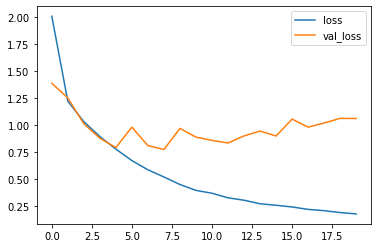

In [45]:
# plot loss per iteration
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

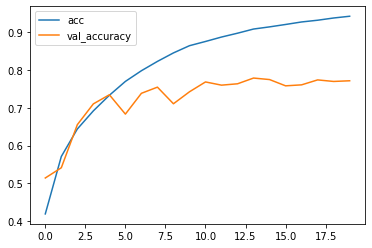

In [46]:
# plot accuracy per iteration
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

313/313 [==============================] - 2s 5ms/step
Confusion matrix, without normalization
[[690  11 126  26  26   7  16  11  61  26]
 [ 19 839  12   7   7   4  11   2  32  67]
 [ 38   1 675  42  91  41  81  21   6   4]
 [ 20   8 101 530  84 124  73  43  12   5]
 [ 11   1  86  65 697  32  67  36   5   0]
 [  8   1  96 161  53 599  24  51   4   3]
 [  7   1  49  42  26  17 847   8   1   2]
 [ 11   3  45  29  89  41  10 761   5   6]
 [ 47  14  24  19   8   3  16   7 849  13]
 [ 21  55  11  12  13  11   4  14  36 823]]


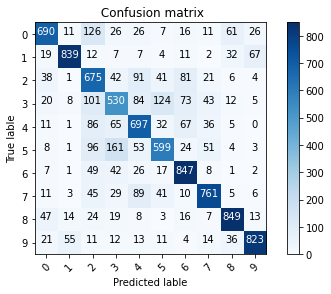

In [32]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
def plt_CM(cm, classes,
           normalize = False,
           title = ' Confusion matrix',
           cmap = plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    print('Confusion matrix, with normalization')
  else:
    print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = (np.arange(len(classes)))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
      plt.text(j, i, format(cm[i,j], fmt),
              horizontalalignment = 'center',
              color = 'white' if cm[i,j] > thresh else "black")
    plt.tight_layout()  
    plt.ylabel("True lable")
    plt.xlabel("Predicted lable")
    plt.show()

ptest = model.predict(xtest).argmax(axis = 1)
cm = confusion_matrix(ytest, ptest)
plt_CM(cm, list(range(10)))

Text(0.5, 1.0, 'True label is: automobile and predicted one is: ship')

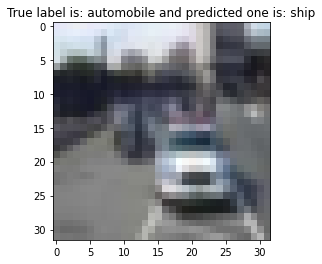

In [39]:
# lable mapping....
labels = """
airplan
automobile
bird
cat
deer
dog
frog
horse
ship
truck""".split()

#Some misclassifid examples
misclassified_idx = np.where(ptest != ytest)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(xtest[i],cmap = 'gray')
plt.title('True label is: %s and predicted one is: %s' % (labels[ytest[i]], labels[ptest[i]]))